# Visualization 03 - 여러가지 그래프

<img src="http://matplotlib.org/_static/logo2.svg" style="float:left;width:320px"/>

### 패스트캠퍼스 [금융데이터분석 입문]
#### 이승준 fb.com/plusjune

In [46]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
from datetime import datetime

# 값 설정
plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True

# Line chart

<class 'numpy.ndarray'>


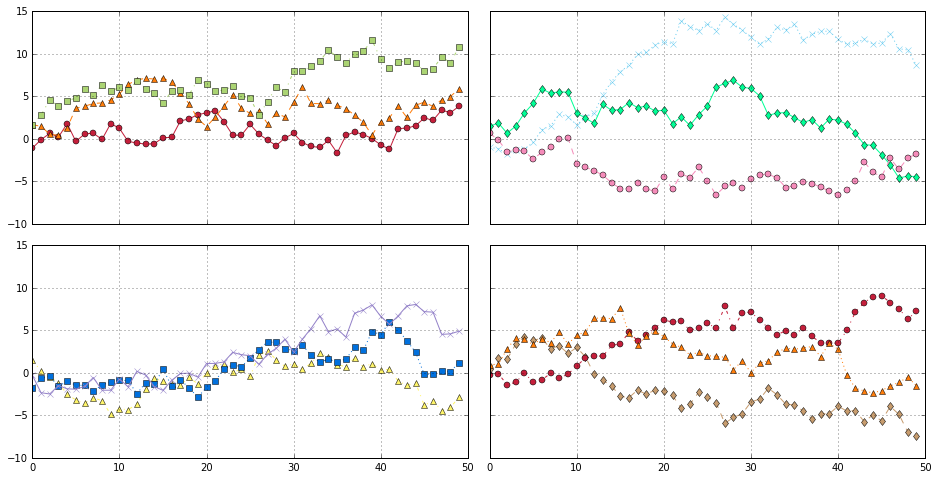

In [27]:
from itertools import cycle
colors = cycle([ "#C41F3B", "#FF7D0A", "#ABD473", "#69CCF0", "#00FF96", 
                "#F58CBA", "#FFF569", "#0070DE", "#9482C9", "#C79C6E" ])
line_styles = cycle(['-', '--', '-.', ':'])
markers = cycle(['o', '^', 's', 'x', 'd'])

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(16,8))
fig.subplots_adjust(wspace =0.05, hspace=0.1) # 좁은간격

print (type(axes))
x = range(0, 50)
for ax in axes.reshape(-1):
    ax.grid(True)
    for i in range(3): #하나의 서브플롯에 3개씩
        y = np.random.randn(50).cumsum()
        style = next(line_styles) + next(markers)
        ax.plot(x, y, style, color=next(colors))

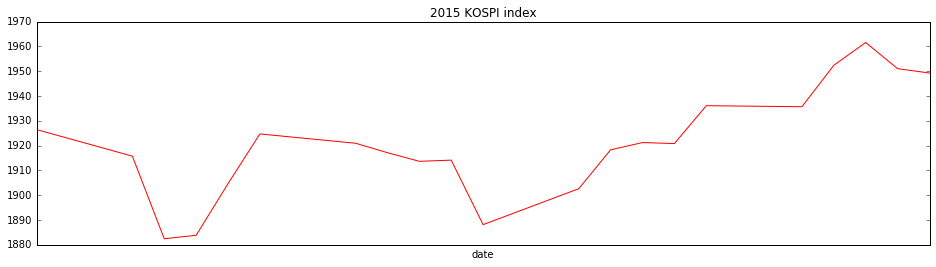

In [28]:
df = data.get_data_yahoo('^KS11', datetime(2015, 1, 1), datetime(2015, 1, 30))
x_val = df.index
y_val = df['Adj Close']

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)

ax.set_xticks(range(0, len(x_val)))
ax.set_xticklabels(df.index, rotation=50, fontsize="small")

ax.set_title('2015 KOSPI index')
ax.set_xlabel('date')
plt.plot(y_val, "red")


# Bar chart

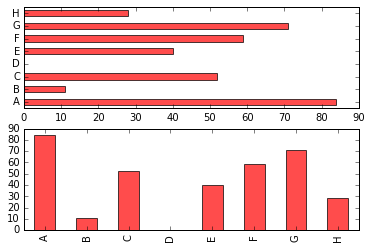

In [29]:
fig, axes = plt.subplots(2,1)

s = pd.Series(np.random.randint(0, 100, 8), index=list('ABCDEFGH'))
s.plot(kind='barh', ax=axes[0], color='r', alpha=0.7)
s.plot(kind='bar', ax=axes[1], color='r', alpha=0.7)


# Scatter chart

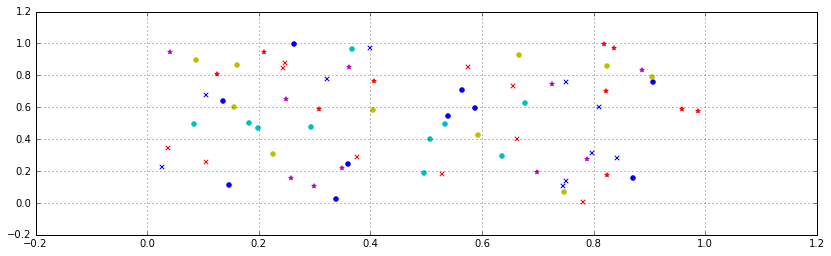

In [36]:
import matplotlib.pyplot as plt
from numpy.random import random

colors = ['b', 'c', 'y', 'm', 'r']

plt.scatter(random(10), random(10), marker='x', color=colors[0])
plt.scatter(random(10), random(10), marker='o', color=colors[0])
plt.scatter(random(10), random(10), marker='o', color=colors[1])
plt.scatter(random(10), random(10), marker='o', color=colors[2])
plt.scatter(random(10), random(10), marker='*', color=colors[3])
plt.scatter(random(10), random(10), marker='*', color=colors[4])
plt.scatter(random(10), random(10), marker='x', color=colors[4])

plt.show()

# Scatter chart 3D

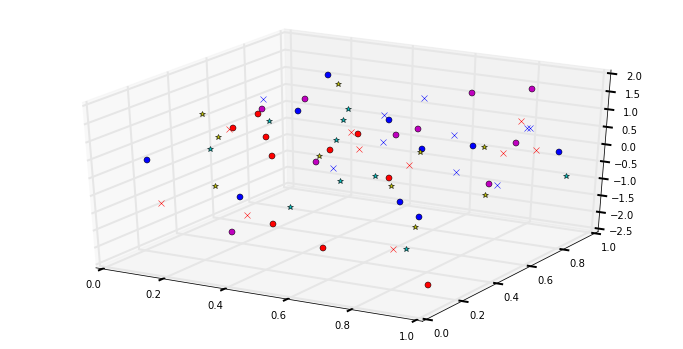

In [54]:
import matplotlib.pyplot as plt
from numpy.random import randn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12,6)

colors=['b', 'c', 'y', 'm', 'r']
ax = plt.subplot(111, projection='3d')

ax.plot(random(10), random(10), randn(10), 'x', color=colors[0])
ax.plot(random(10), random(10), randn(10), 'o', color=colors[0])
ax.plot(random(10), random(10), randn(10), '*', color=colors[1])
ax.plot(random(10), random(10), randn(10), '*', color=colors[2])
ax.plot(random(10), random(10), randn(10), 'o', color=colors[3])
ax.plot(random(10), random(10), randn(10), 'o', color=colors[4])
ax.plot(random(10), random(10), randn(10), 'x', color=colors[4])

plt.show()

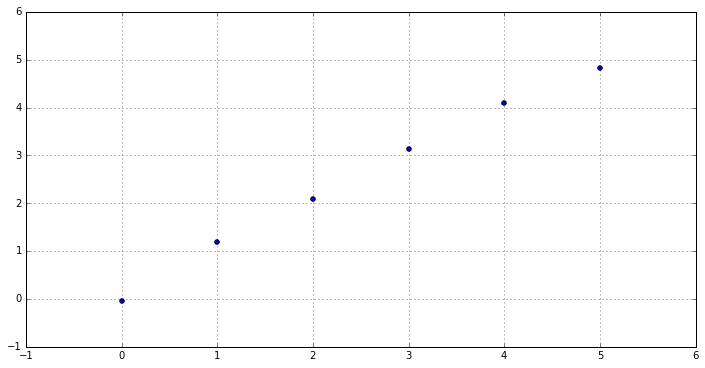

In [55]:
x = np.linspace(0,5,6)
plt.scatter(x, x + 0.25*randn(len(x)))

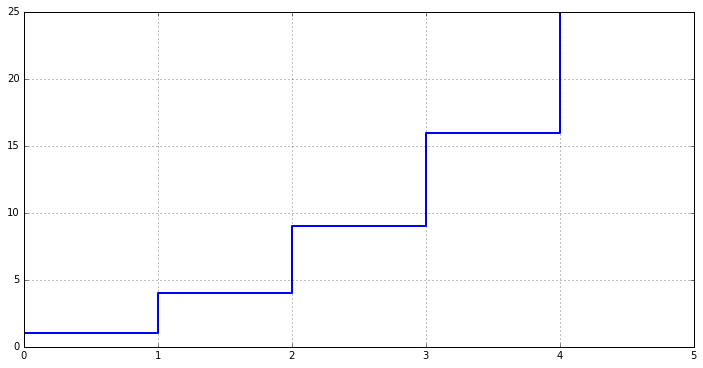

In [56]:
plt.step(x, x**2, lw=2)

<Container object of 6 artists>

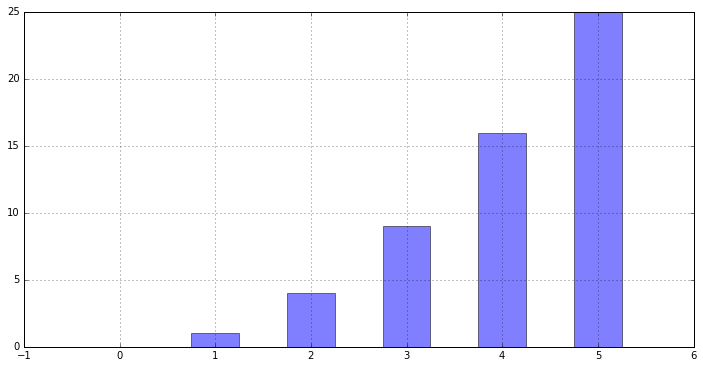

In [57]:
plt.bar(x, x**2, align="center", width=0.5, alpha=0.5)

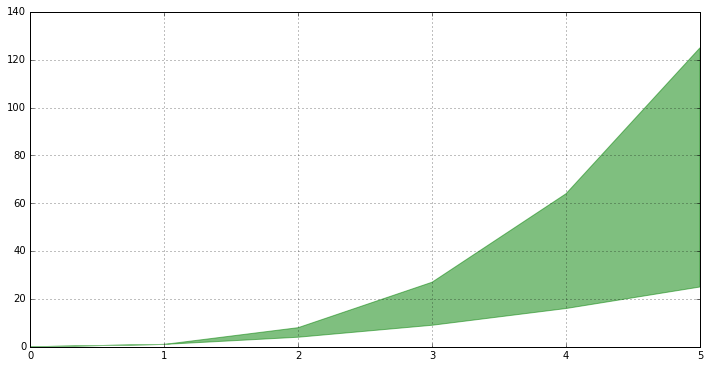

In [58]:
plt.fill_between(x, x**2, x**3, color="green", alpha=0.5);

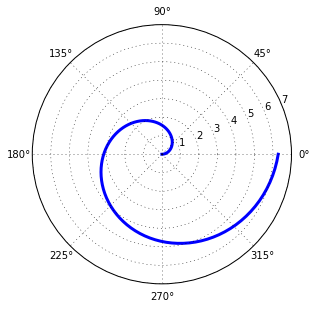

In [59]:
import math

fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * math.pi, 100)
ax.plot(t, t, color='blue', lw=3);

# 캔들 차트
* from matplotlib.finance import candlestick2_ohlc

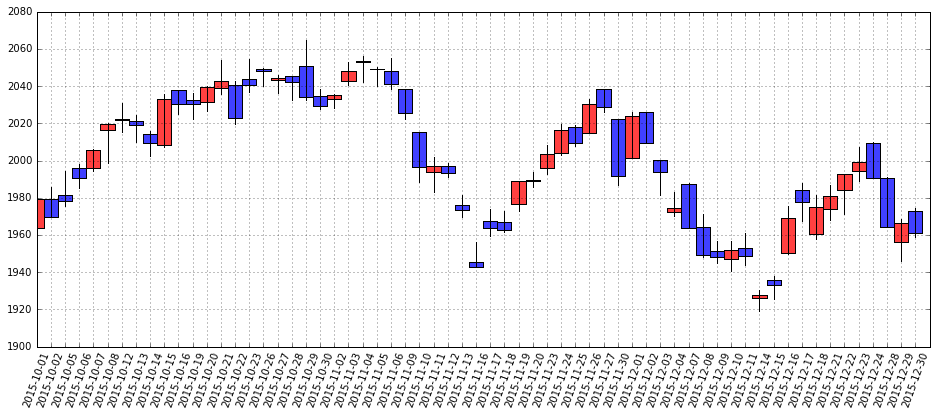

In [60]:
from matplotlib.finance import candlestick2_ohlc

start = datetime(2015, 10, 1)
end = datetime(2015, 12, 30)
df = data.get_data_yahoo('^KS11', start=start, end=end)

fig, ax = plt.subplots(figsize=(16,6))
ax.set_xticks(range(0, len(df)))
ax.set_xticklabels(df.index.strftime('%Y-%m-%d'), rotation=70)

candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], 
                  width=1, colorup='r', colordown='b')
plt.show()

# 다양한 그래프
* http://matplotlib.org/gallery.html